# Index

## I. EDA

### A. Numeric
### B. Categorical

In [1]:
#import libraries
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import isodate
from datetime import datetime, timedelta
import pytz

# I. EDA

In [2]:
#create charts for each column. Exclude URL, Title, Description, Channel ID, Tags, Category ID, Duration (unformat)

In [22]:
#bring in data
data_clean = pd.read_csv('../data/data_clean_pt1.csv', index_col = 0)

In [23]:
#check shape for number of records to expect
data_clean.shape

(3956, 24)

In [24]:
data_clean.columns

Index(['Video URL', 'Title', 'Description', 'Published At', 'Channel ID',
       'Channel Title', 'Tags', 'Category ID', 'Default Language', 'Duration',
       'View Count', 'Like Count', 'Dislike Count', 'Favorite Count',
       'Comment Count', 'Comments Disabled', 'Ratings Disabled',
       'Duration Time Format', 'Video Age Days', 'Views per Month',
       'Likes per Month', 'Category', 'No Description', 'No Tags'],
      dtype='object')

## A. Numeric EDA

In [25]:
data_clean.select_dtypes('number').head(0).T

""
Category ID
View Count
Like Count
Dislike Count
Favorite Count
Comment Count
Video Age Days
Views per Month
Likes per Month
No Description


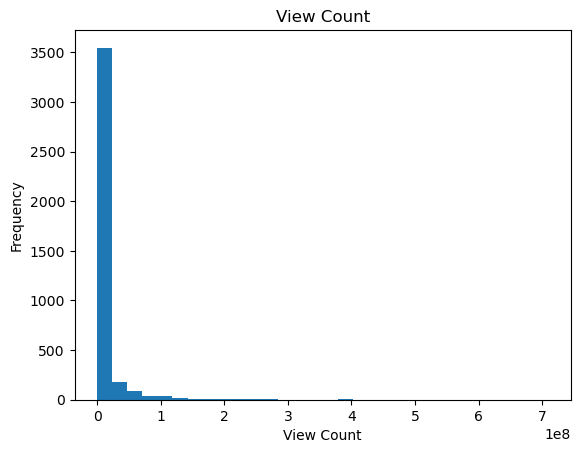

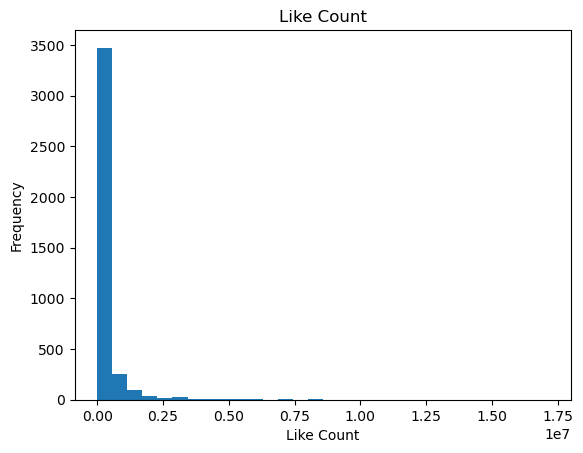

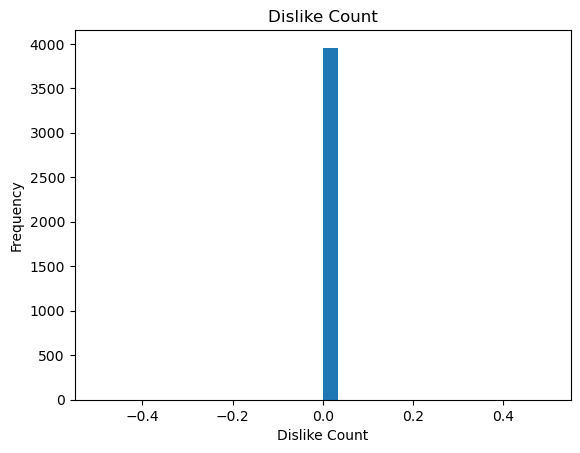

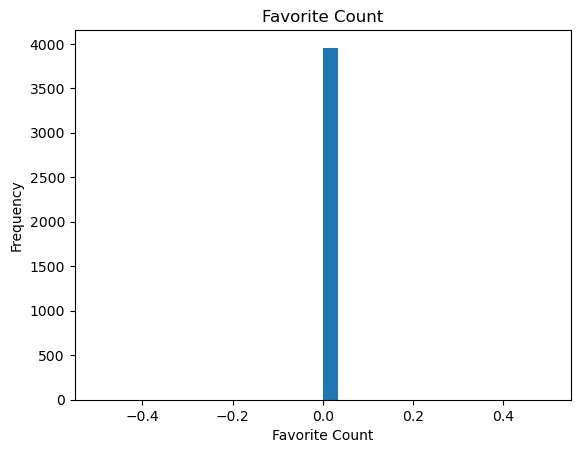

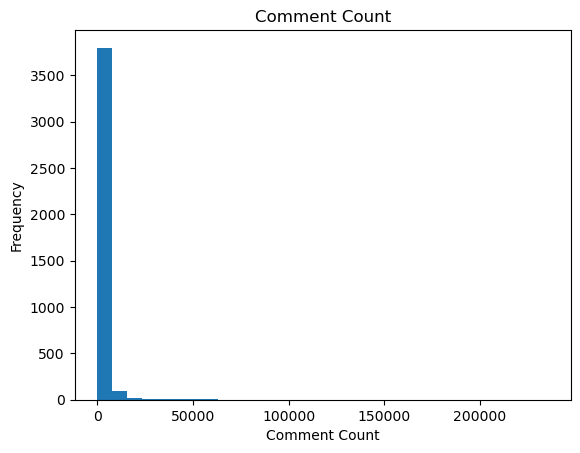

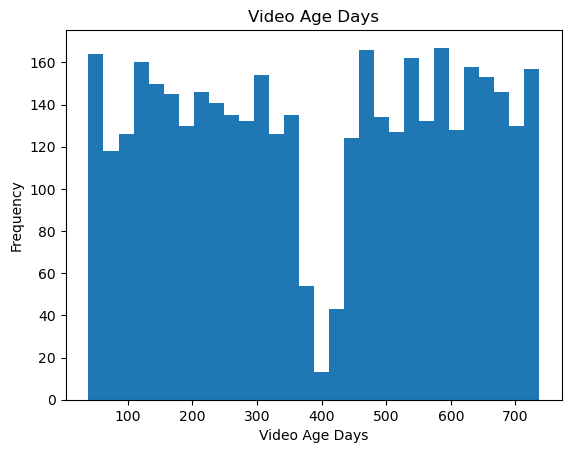

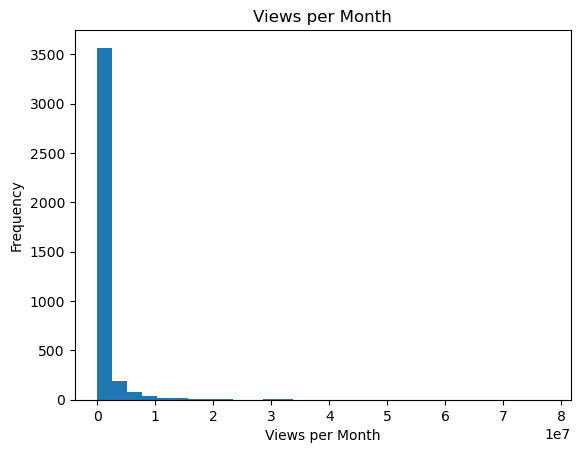

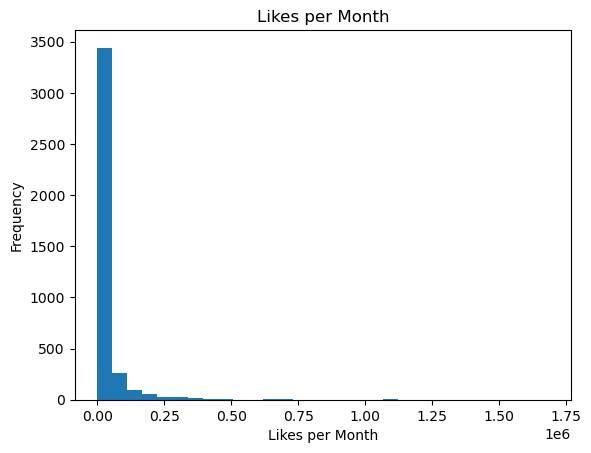

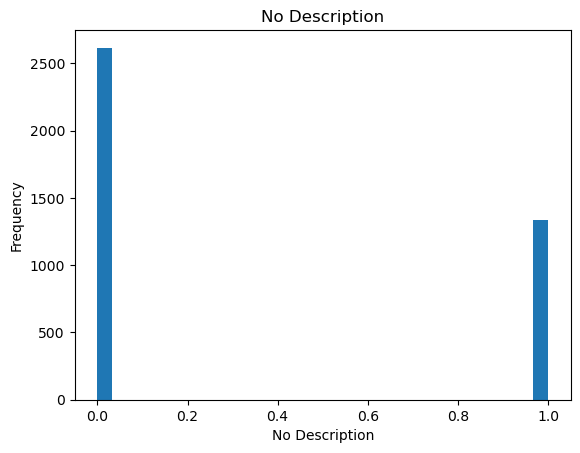

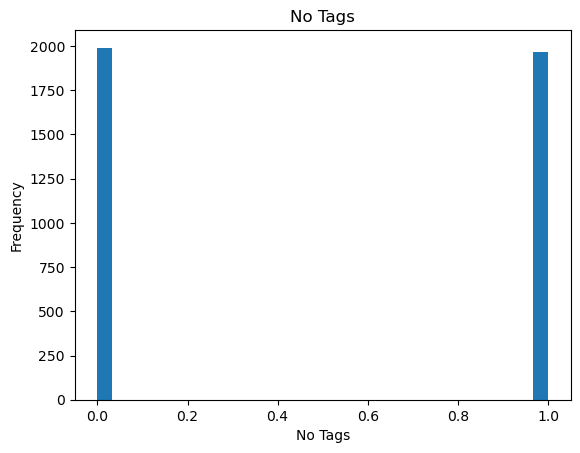

In [26]:
#looking at numerics, dropping Category ID
for col in data_clean.select_dtypes("number").drop(columns=['Category ID']):
    plt.figure()
    plt.hist(data_clean[col], bins=30)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(col)
    plt.show()

In [8]:
#create histogram for 300-500 range?

### Numeric Takeaways:
- Dislikes and Favorites are empty - should remove 
- Video age days frequency dips at Videos that are 400 days old
- Change Views, Likes, Comments, Views/mo, Likes/mo to log

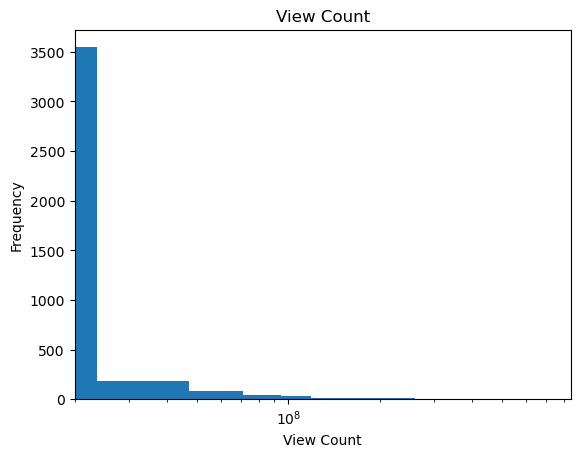

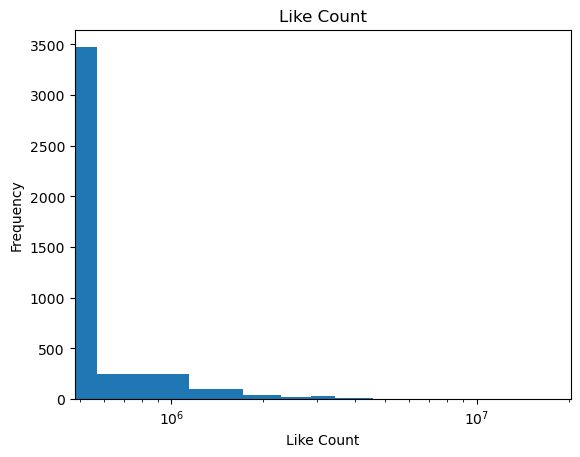

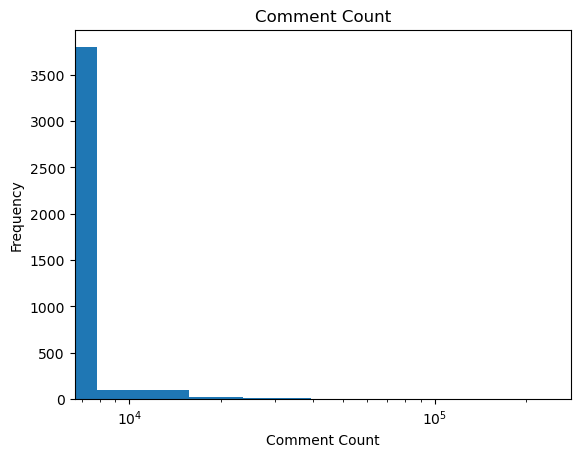

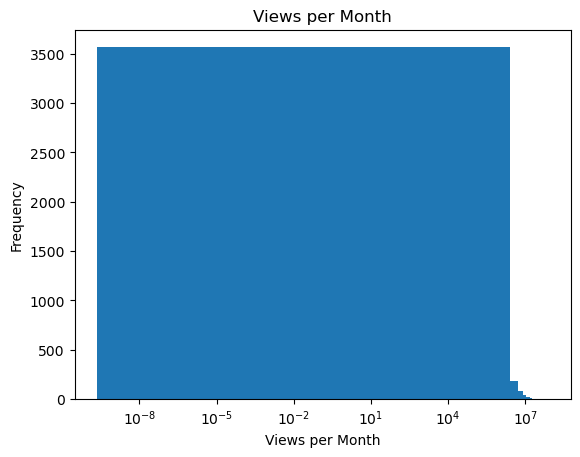

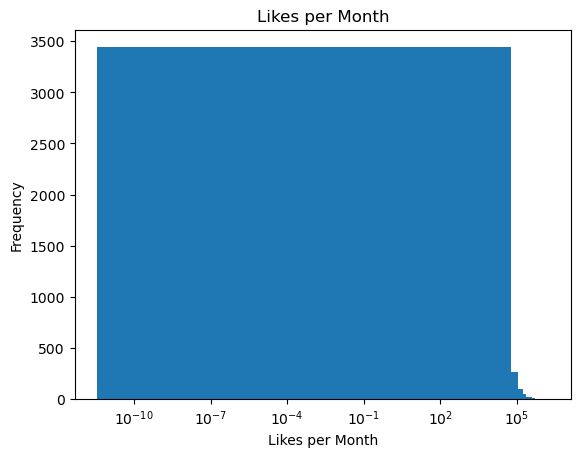

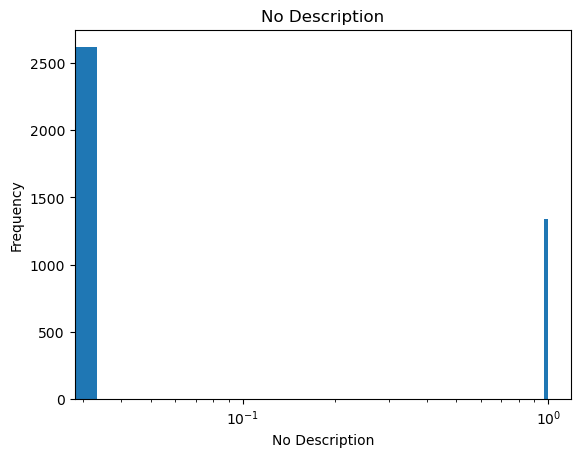

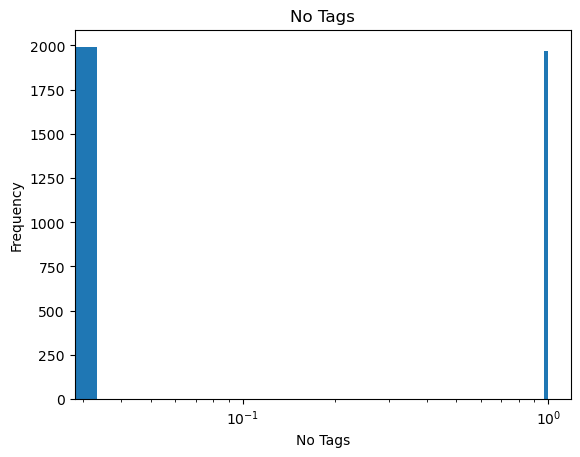

In [27]:
#log of select numerics
for col in data_clean.select_dtypes("number").drop(columns=['Category ID','Dislike Count','Favorite Count',
                                                       'Video Age Days']):
    plt.figure()
    plt.hist(data_clean[col], bins=30)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(col)
    #plt.yscale('log')
    plt.xscale('log')
    plt.show()

In [10]:
#Log transform target variables
#so predict log transform version
#if bin - don't log transform

## B. Categorical Bar Charts

In [11]:
data_clean.select_dtypes('object').head(0).T

""
Video URL
Title
Description
Published At
Channel ID
Channel Title
Tags
Default Language
Duration
Duration Time Format


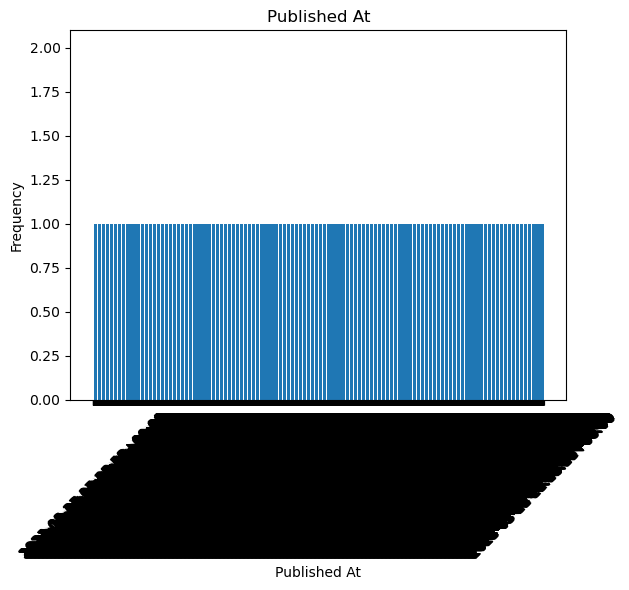

/Users/jtumambing/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12399 (\N{HIRAGANA LETTER HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jtumambing/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12420 (\N{HIRAGANA LETTER YA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jtumambing/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12383 (\N{HIRAGANA LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jtumambing/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12367 (\N{HIRAGANA LETTER KU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jtumambing/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24215 (\N{CJK UNIFIED IDEOGRAPH-5E97}) missing from current 

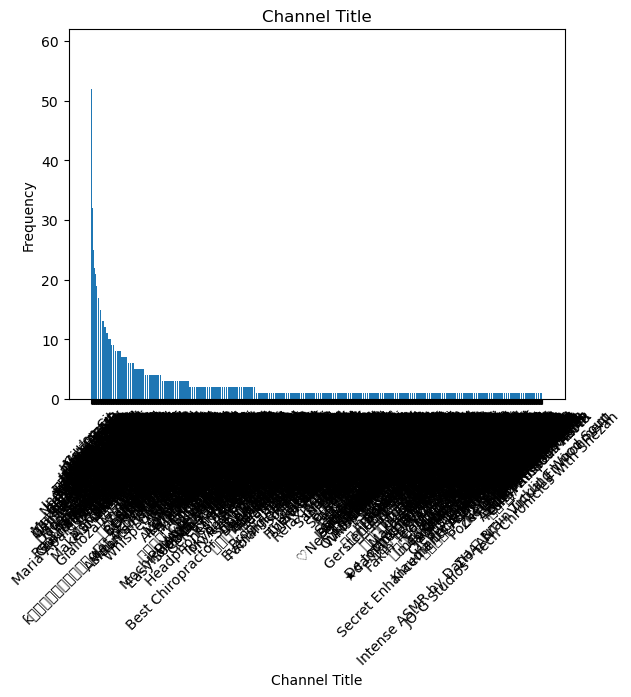

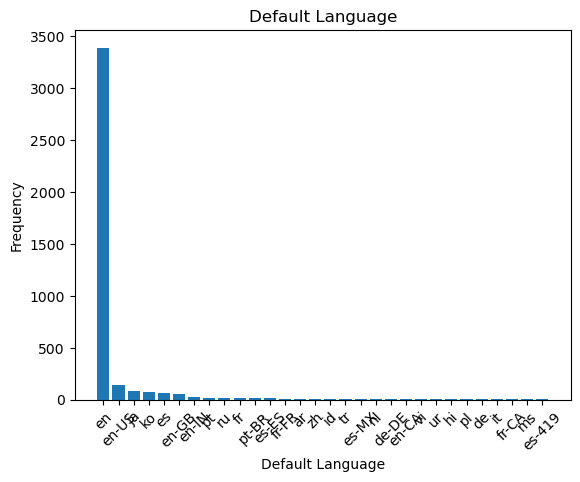

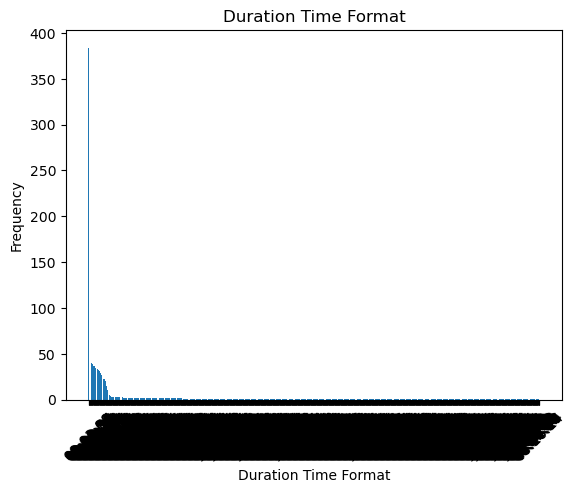

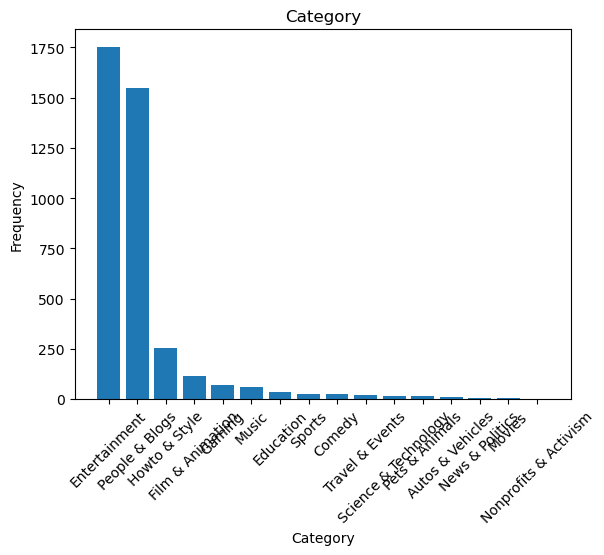

In [12]:
#creating bar charts for categorical data
#exclude URL, Title, Desc, Channel ID, Tags, Duration
for col in data_clean.select_dtypes("object").drop(columns=['Video URL','Title','Description','Channel ID', 'Tags',
                                                       'Duration']):
    plt.figure()
    plt.bar(data_clean[col].value_counts().index,
            data_clean[col].value_counts().values)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

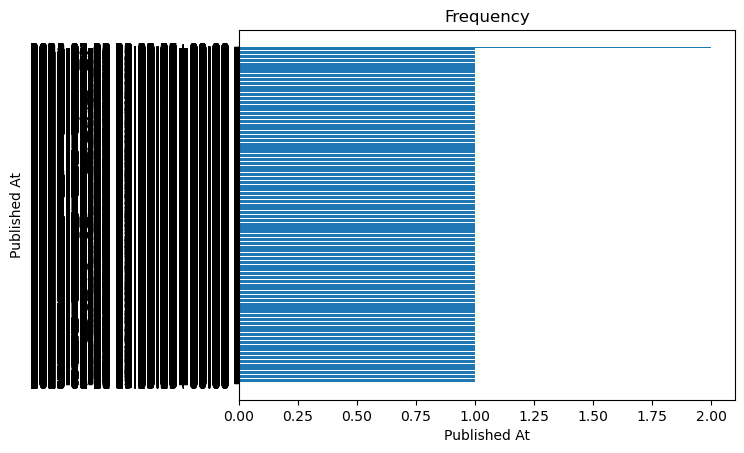

/Users/jtumambing/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12399 (\N{HIRAGANA LETTER HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jtumambing/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12420 (\N{HIRAGANA LETTER YA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jtumambing/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12383 (\N{HIRAGANA LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jtumambing/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12367 (\N{HIRAGANA LETTER KU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jtumambing/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24215 (\N{CJK UNIFIED IDEOGRAPH-5E97}) missing from current 

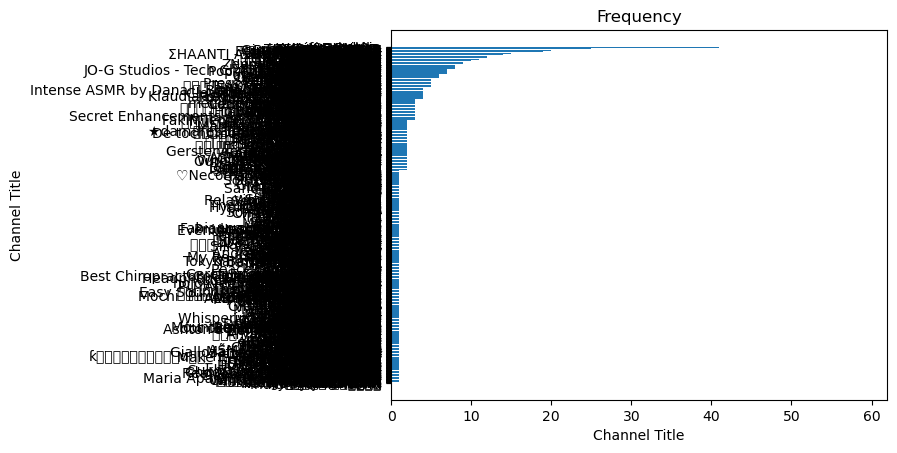

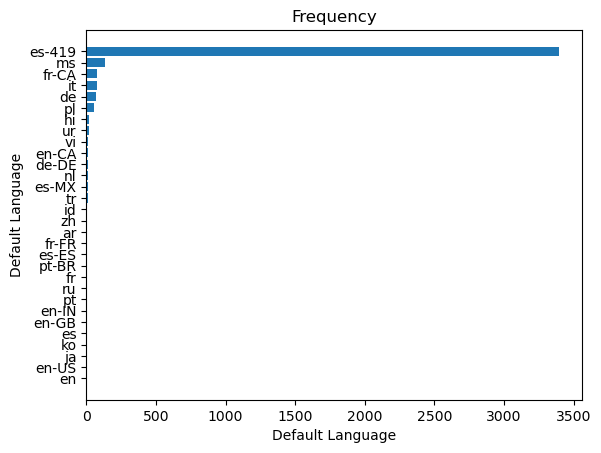

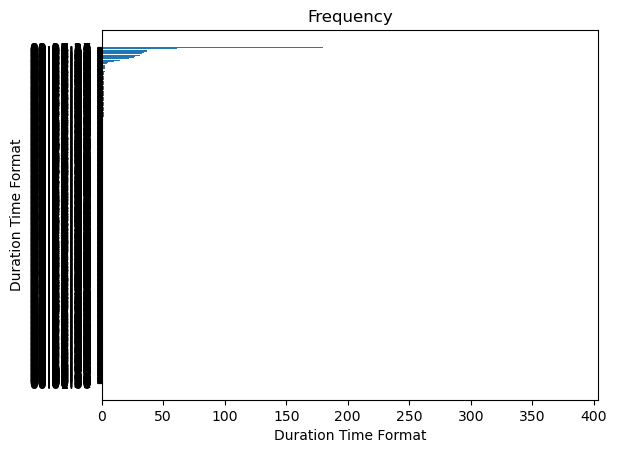

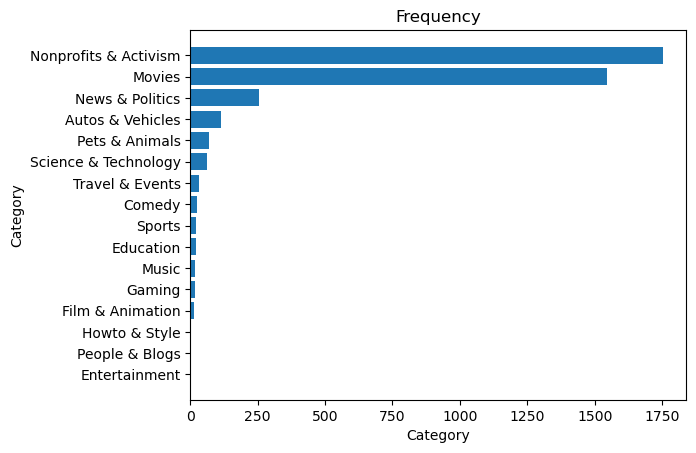

In [13]:
#checking barh
for col in data_clean.select_dtypes("object").drop(columns=['Video URL','Title','Description','Channel ID', 'Tags',
                                                       'Duration']):
    plt.figure()
    plt.barh(data_clean[col].value_counts().index,
            np.sort(data_clean[col].value_counts().values))
    plt.xlabel(col)
    plt.ylabel(col)
    plt.title('Frequency')
    #plt.xticks(rotation=45)
    plt.show()

In [14]:
data_clean['Channel Title'].value_counts().head(30)

Indian ASMR World                 59
Jojo's ASMR                       52
Mol ASMR.                         41
Gibi ASMR                         40
Nanny Art And Craft               32
Mukbang Bersama Bent              32
HAYATAKU はやたく                     30
Dong ASMR                         25
Rhia Official                     25
Jocie B ASMR                      25
benio店長 / ASMR屋さん                 25
The ASMR Ryan                     22
★ 𝒁𝒂𝒉𝒓𝒂 𝑨𝒔𝒎𝒓 ★                    22
asmr zeitgeist                    22
Mr. Lee ASMR                      22
Whispering Willow ASMR            21
Gentle Whispering ASMR            20
Asmr With Sasha                   20
Nanou ASMR                        19
きまぐれクックKimagure Cook              19
anna dreamy ASMR                  19
Lyssie ASMR                       19
Dental Digest                     18
Coromo Sara. ASMR                 18
Satisfying Shorts                 18
Jon Cit                           17
Celaine's ASMR                    16
M

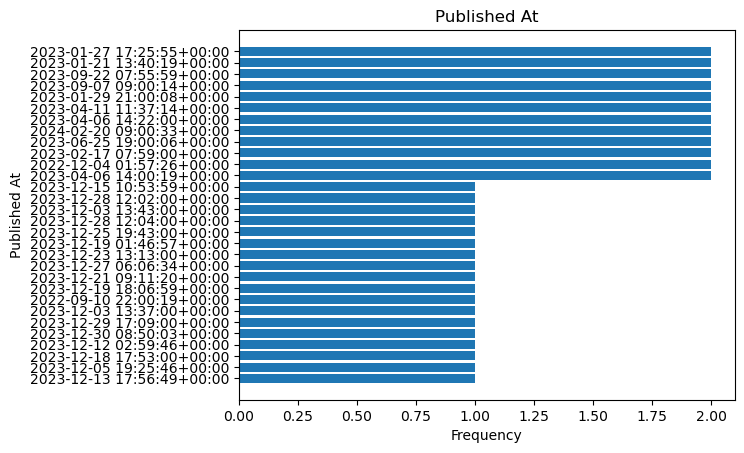

/Users/jtumambing/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12365 (\N{HIRAGANA LETTER KI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jtumambing/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12414 (\N{HIRAGANA LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jtumambing/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12368 (\N{HIRAGANA LETTER GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jtumambing/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12428 (\N{HIRAGANA LETTER RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jtumambing/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from current font.
  

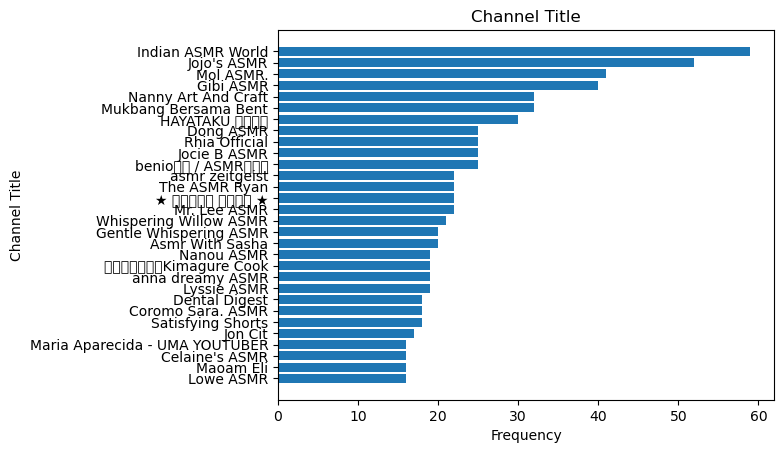

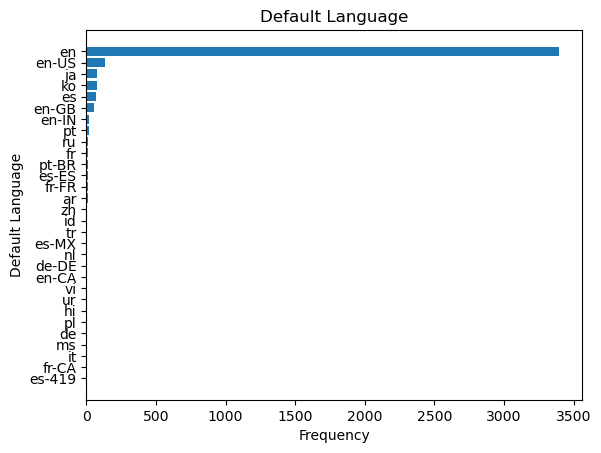

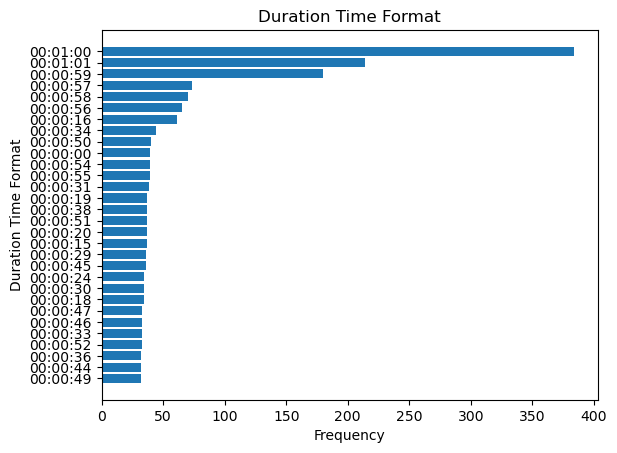

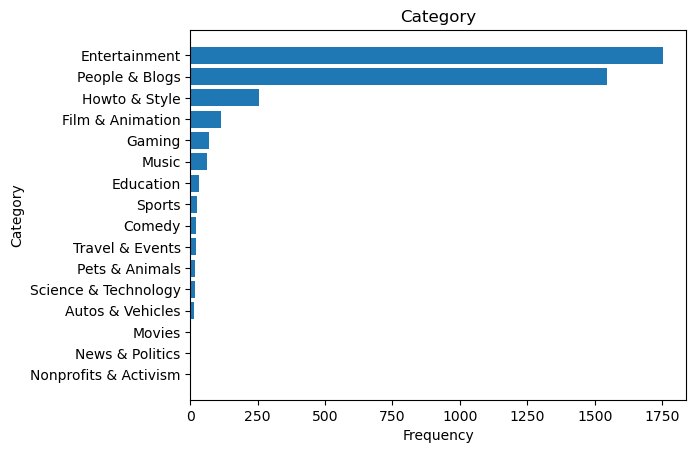

In [17]:
#checking barh, top 30 to reduce chart sizes
for col in data_clean.select_dtypes("object").drop(columns=['Video URL','Title','Description','Channel ID', 'Tags',
                                                       'Duration']):
    # Get value counts
    value_counts = data_clean[col].value_counts()
    
    # Select the top 30
    top_30 = value_counts.head(30)
    top_30_sorted = top_30.sort_values(ascending=True) #sort so that highest freq is top of barh
    
    plt.figure()
    plt.barh(top_30_sorted.index, top_30_sorted.values)  
    plt.xlabel('Frequency')
    plt.ylabel(col)
    plt.title(col)
    plt.show()

### Takeaways  
- What to do about title's with special characters  
- Related, language? - dec: remove non en
- Remove shorts - check total count of them  
- Is category any helpful? - remove or one hot encode? - ohe top 6 and then other np.map


- Want to get region but can't - pie in sky wish

In [18]:
#count shorts
data_clean.shape

(3956, 25)

In [19]:
data_clean[data_clean['Duration Time Format'] <= '00:01:00']

,Unnamed: 0,Video URL,Title,Description,Published At,Channel ID,Channel Title,Tags,Category ID,Default Language,...,Comment Count,Comments Disabled,Ratings Disabled,Duration Time Format,Video Age Days,Views per Month,Likes per Month,Category,No Description,No Tags
8,8,https://www.youtube.com/watch?v=jalPaPGoZQQ,ASMR Aesthetic Journaling 🧡 Orange Theme #shor...,ASMR Aesthetic Journaling 🧡 Orange Theme #shor...,2022-09-16 04:49:18+00:00,UCWBYtp1F0-6cjMaWykmBvyA,The Crafty Lefty,"asmr, asmr for sleep, asmr journal, asmr sleep...",22,en,...,5946,False,False,00:01:00,722,1.952909e+06,77440.412050,People & Blogs,0,0
15,15,https://www.youtube.com/watch?v=rtwG_4mZ40Q,Orange ASMR Snacks vs Cavities!?,Let's Find Out If Orange ASMR Snacks Will Caus...,2022-09-22 11:15:05+00:00,UC7u9o8BHiJyH2_cef_nC7tQ,Dental Digest,NaN,22,en,...,5734,False,False,00:00:36,716,5.723546e+06,149021.657938,People & Blogs,0,1
21,21,https://www.youtube.com/watch?v=HZxhGfHSbR4,(ASMR) 3 Bets You Will ALWAYS Win! #Shorts,Here are a few EASY bets to try on your friend...,2022-09-22 20:30:01+00:00,UCyoTDnXaBFX4KOG9KyvdPFw,Dido ASMR,"ASMR, ASMR Whisper, Whispering, ASMR mouth sou...",24,en-GB,...,220,False,False,00:00:57,716,1.891454e+04,1599.763734,Entertainment,0,0
22,22,https://www.youtube.com/watch?v=JOV89_Renos,"ASMR eating spicy food | asmr eating noodles, ...","#asmr #asmreating #mukbang\nasmr,\nasmr eating...",2022-09-05 14:15:02+00:00,UCxIqzFyychUsLlSC1-y8IEw,Malich ASMR,"asmr eating, asmr eating spicy food, asmr eati...",22,en,...,1956,False,False,00:00:26,733,6.060436e+05,22998.195202,People & Blogs,0,0
23,23,https://www.youtube.com/watch?v=FhiuR3t0Hig,⚡1 Minute ASMR FAST Makeup on YOUR FACE,Hey friends ! \n\nMuch love 💕 \n\nYou can also...,2022-09-06 14:37:03+00:00,UCIS4j6QTByiOBhn-5IhtaGw,Helvetica ASMR,#asmr #asmrspa #asmrskincare #skincare,24,en-US,...,352,False,False,00:01:00,732,6.206945e+04,1515.015938,Entertainment,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,3948,https://www.youtube.com/watch?v=swMb7x7RgSw,#asmr @AsmrWD 신기한물먹방 #ASMRDRINKING #asmreating...,@AsmrWD \n#asmrdrinking,2024-07-18 08:25:00+00:00,UCbbiEt2oAN3F5tJwAHOIPbA,Asmr 세계 음주,NaN,22,en,...,109,False,False,00:01:00,51,3.508701e+06,89271.127451,People & Blogs,0,1
3949,3949,https://www.youtube.com/watch?v=AhCAwMC8tKc,ASMR Homeless amazıng transformation #barber #...,#barber #barbershop #haircut #hairstyle #hairs...,2024-07-23 03:31:23+00:00,UCyfyGaeTtRpvtOwrULRdcew,Asmr homeless tv,Homeless asmr,22,en,...,9,False,False,00:00:58,46,1.842357e+05,1426.277174,People & Blogs,0,0
3951,3951,https://www.youtube.com/watch?v=xp5GeigYdq0,ASMR SELF CARE NIGHT 🍒🌸 #asmr #shorts #nails,NaN,2024-07-18 21:22:01+00:00,UCjvt48MCuwaO-s_Ur0i4V5A,Katie’s Nails,NaN,22,en,...,49,False,False,00:00:59,51,2.038239e+05,10006.486928,People & Blogs,1,1
3952,3952,https://www.youtube.com/watch?v=hx7xGsC6eEw,Midnight Asmr Super Chill with Cute Order | Mẫ...,NaN,2024-07-29 15:49:17+00:00,UC2hqpOywcs4s8MjBCPYno8g,Mẫn Mẫn Miladen Official,NaN,22,en,...,337,False,False,00:01:00,40,1.362994e+05,7055.906250,People & Blogs,1,1


In [20]:
data_clean[data_clean['Duration Time Format'] <= '00:01:00'].shape[0]

2266

## Next steps

- What is going on with Video Age Days? - roll with it
- Decide how to tag No Description  
    - indicator column - no desc - done
- Decide how to tag No Tags
    - indicator - done
- Remove non en?
    - throw away non en
- Remove shorts?
    - yes, remove, rerun query
    - convert to minutes
    - use total minutes, don't extra part
    - histogram
- Category - take top X and encode rest as 'Other' - use np.map
    - ok
- Bin Views/mo and Likes/mo - what is threshold - median?
    - yes
- Remove 0 likes and/or 0 comments
- Create col for month
- Create col for time in 24 hrs

## Admin Questions

- How to structure notebooks if one was prelim and next is next data run
- How do people use regressions for insights? or just predictions?

### Future
- Github - expectations

## D. Final Clean

This section will consist of:
   1. Tagging No Description
   2. Tagging No Tags
   3. Remove non en?
   4. Remove shorts?
   5. Calculate Video age
   6. Bin categories
   7. Bin Views/mo
   8. Bin Likes/mo
   9. Add number of tags
   
Other:
- Time? - bin by time of day?
    - Wish had region - check if by channel
- Month?

# II. EDA

Thoughts:
- Most views / likes by:
    - Category
    - Tags
    
    
Don't need

- getting to know data

Questions:
- have to unlist tags and then vectorizing?
    - apply lambda x: - make it a string

In [21]:
data_clean.head(0).T

""
Unnamed: 0
Video URL
Title
Description
Published At
Channel ID
Channel Title
Tags
Category ID
Default Language


# III. Model Preprocessing

This section will consist of: (before or after train test split)
   1. OHE Tags?, language, month
   2. Train test split
   3. Vectorize Title, Description - countvectorizer, use n grams - def scale
   4. 
   5. 
   6. 
   7. 
   8. 
   
   
is there any way to auto number
